In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-classification-dataset/diabetesData.csv


# 🩺 Diabetes Classification: EDA and Machine Learning

## 📚 Table of Contents
1. [Introduction](##introduction) 🌟
2. [Data Loading](##data-loading) 📊
3. [Exploratory Data Analysis (EDA)](##exploratory-data-analysis-eda) 🔍
   - 3.1 [Data Overview](###data-overview) 📋
   - 3.2 [Data Visualization](###data-visualization) 📈
   - 3.3 [Correlation Analysis](###correlation-analysis) 🔗
4. [Data Preprocessing](##data-preprocessing) ⚙️
5. [Machine Learning Models](##machine-learning-models) 🤖
   - 5.1 [Logistic Regression](##logistic-regression) 📉
   - 5.2 [Decision Tree Classifier](##decision-tree-classifier) 🌳
   - 5.3 [Random Forest Classifier](##random-forest-classifier) 🌲
   - 5.4 [Support Vector Machine (SVM)](##support-vector-machine-svm) 🛡️
6. [Model Evaluation](##model-evaluation) 📊
7. [Conclusion](##conclusion) ✅
8. [References](##references) 📚

## Introduction 🌍
Diabetes is a chronic disease that affects millions of people worldwide. Early detection is crucial for effective management. In this notebook, we will explore a diabetes dataset, perform exploratory data analysis (EDA), and build machine learning models to classify diabetes.

## Data Loading 📥

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import warnings

init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/diabetes-classification-dataset/diabetesData.csv')

## Exploratory Data Analysis (EDA) 🔍

### Data Overview 📋

In [5]:
print(df.shape)
df.head()

(768, 9)


,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


### Predicting Diabetes based on factors such as bmi, age, number of pregnancies etc

#### For Each Attribute:

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function
* Age (years)

**General info**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_preg             768 non-null    int64  
 1   plasma_glucose_conc  768 non-null    int64  
 2   bp                   768 non-null    int64  
 3   tricepsthickness     768 non-null    int64  
 4   insulin              768 non-null    int64  
 5   BMI                  768 non-null    float64
 6   pedigree_func        768 non-null    float64
 7   age                  768 non-null    int64  
 8   target               768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


**Desscribe numeric features**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plasma_glucose_conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
tricepsthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree_func,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


**Desscribe object features**

In [8]:
df.describe(include='object').T

,count,unique,top,freq
target,768,2,tested_negative,500


In [9]:
df.isnull().sum()

num_preg               0
plasma_glucose_conc    0
bp                     0
tricepsthickness       0
insulin                0
BMI                    0
pedigree_func          0
age                    0
target                 0
dtype: int64

In [10]:
df['target'].value_counts()

target
tested_negative    500
tested_positive    268
Name: count, dtype: int64

### Data Visualization 📈

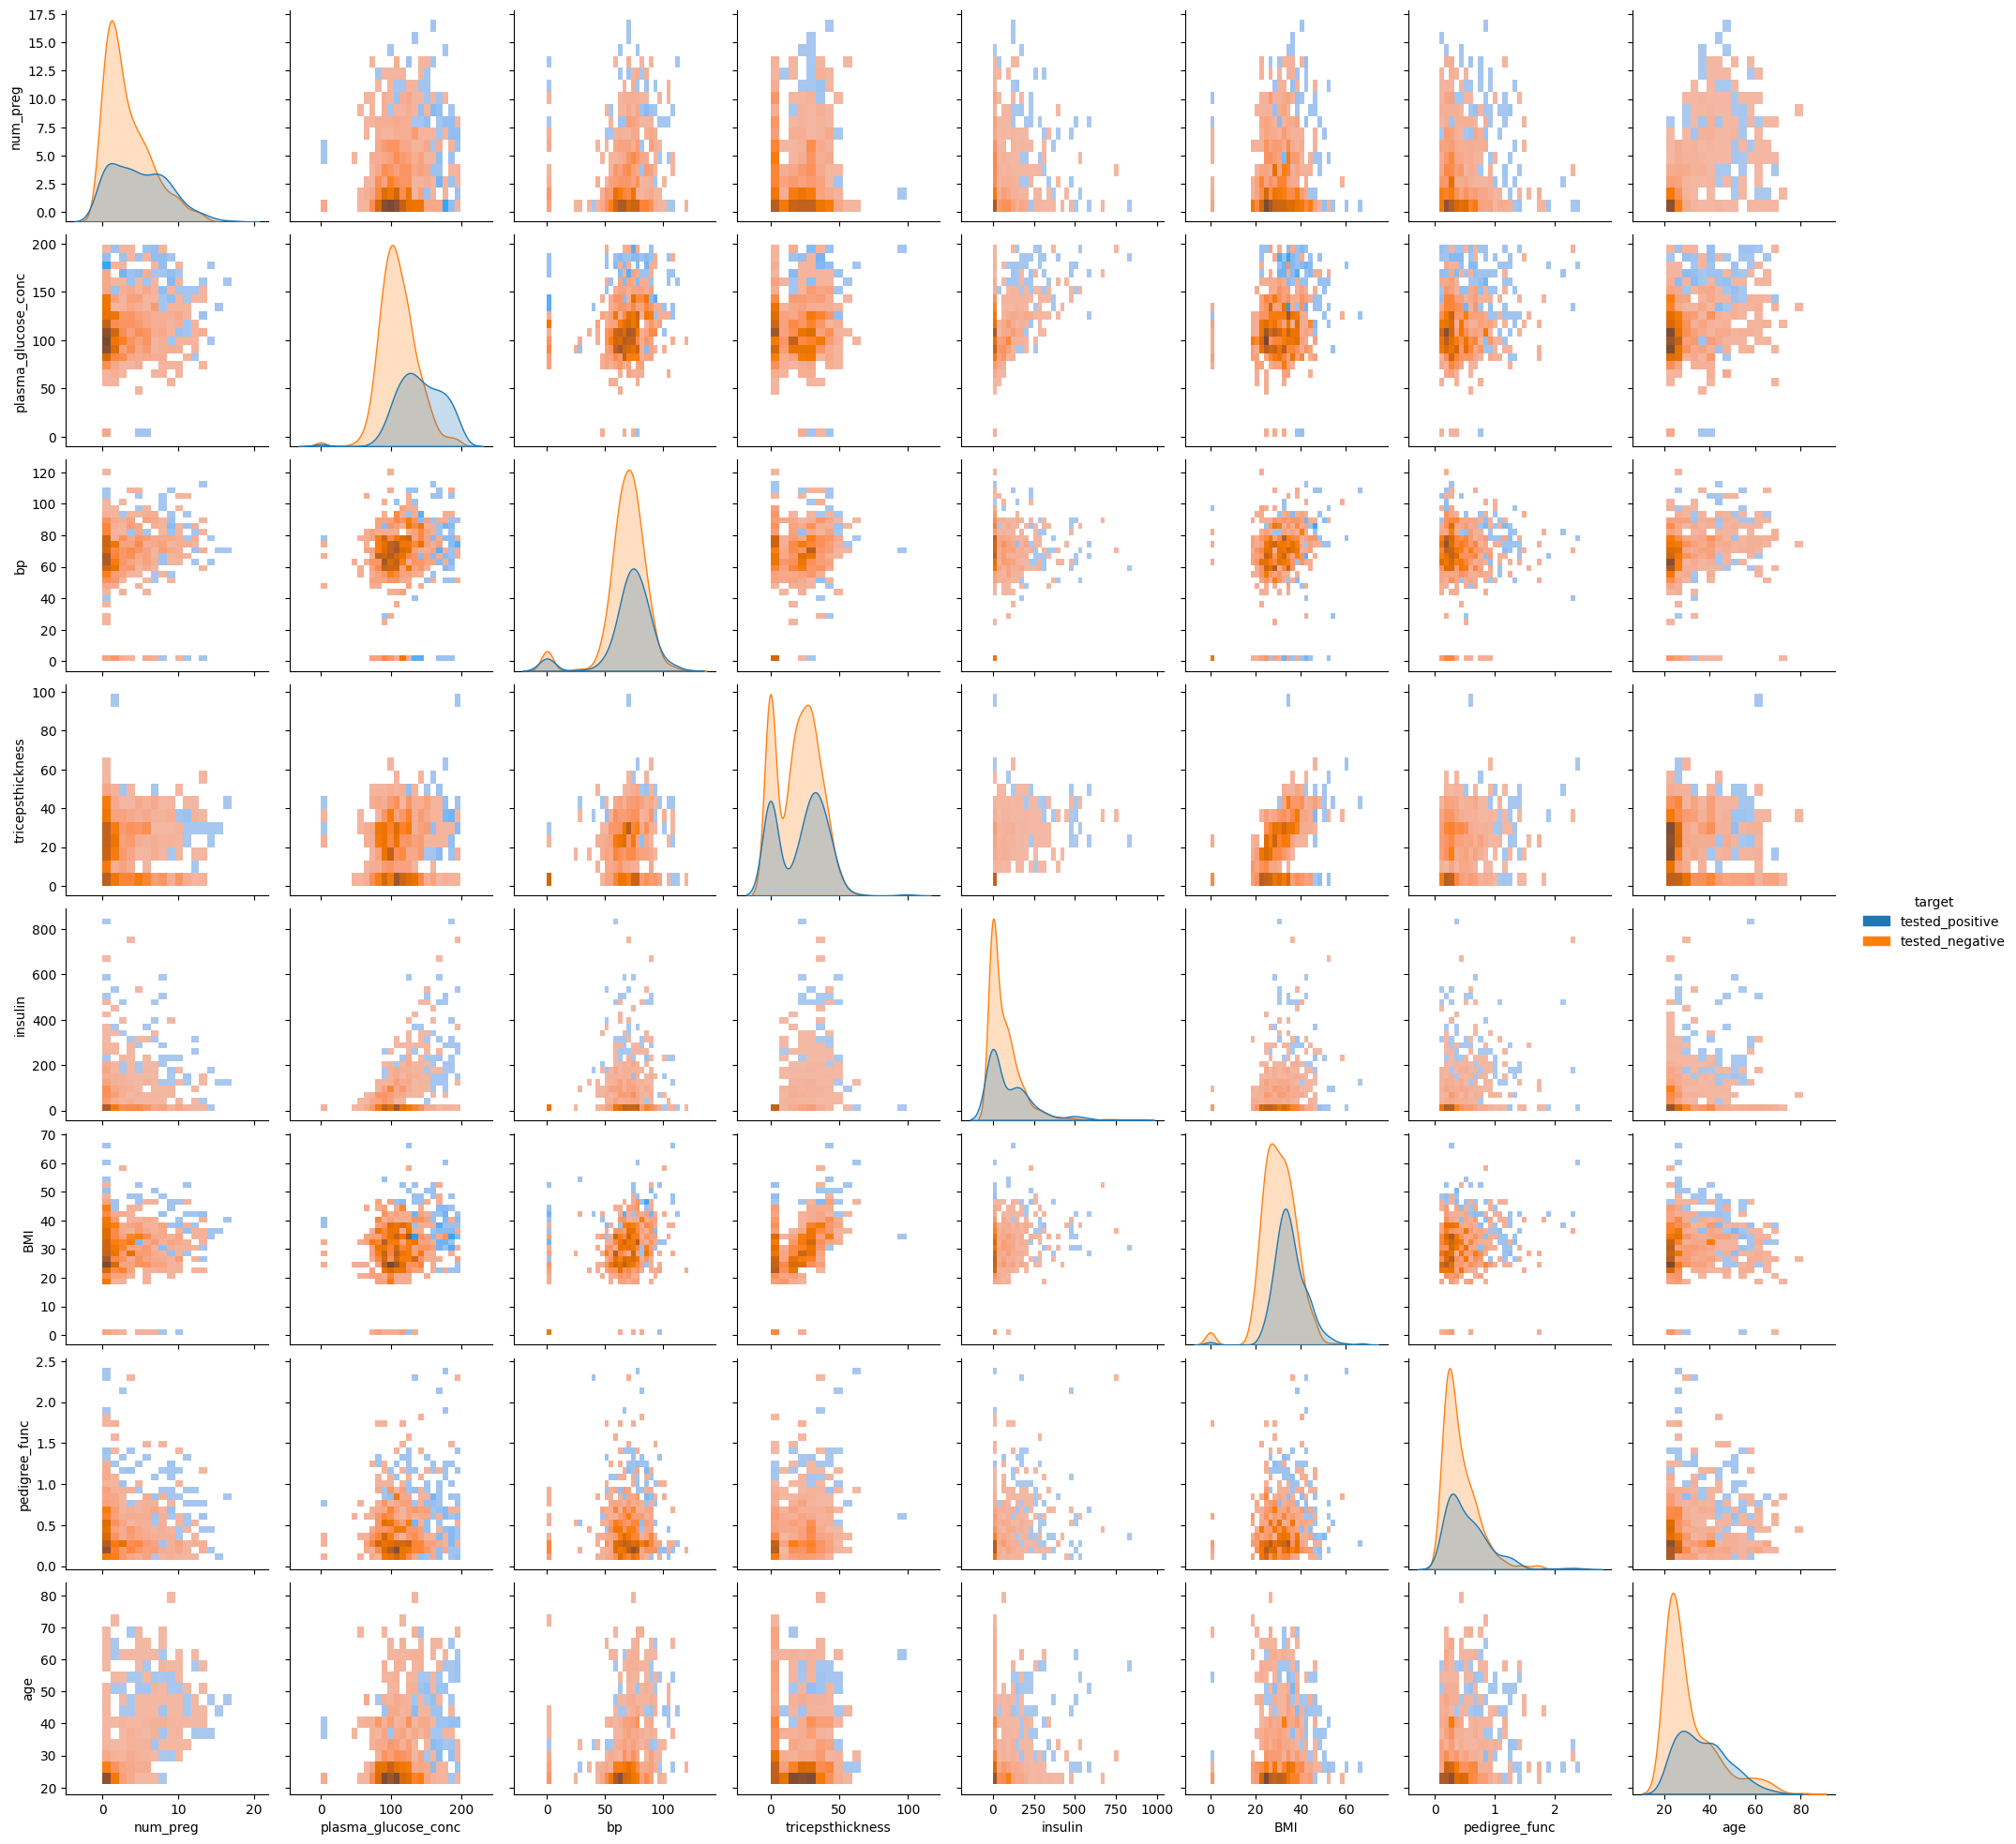

In [11]:
sns.pairplot(data=df, kind='hist', diag_kind='kde', hue='target');

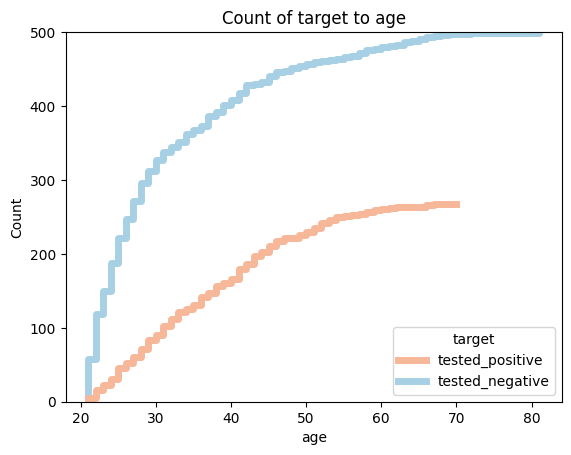

In [12]:
sns.ecdfplot(data=df, x='age', hue='target', linewidth=5, palette='RdBu', stat='count')
plt.title('Count of target to age');

In [13]:
fig = px.histogram(df, x='age', color='target')
fig.show(renderer='iframe_connected')

In [14]:
fig = px.box(df, x="num_preg", y="age",
	         color="target")
fig.show(renderer='iframe_connected')

In [15]:
fig = px.density_heatmap(
    df,
    x='BMI',
    y='tricepsthickness',
    
    width=1200,  
    height=800, 

    text_auto=True,    
)

fig.update_layout(
    margin=dict(l=50, r=50, t=50, b=50),  
    autosize=False, 
    font_size=12 
)

fig.show(renderer='iframe_connected')

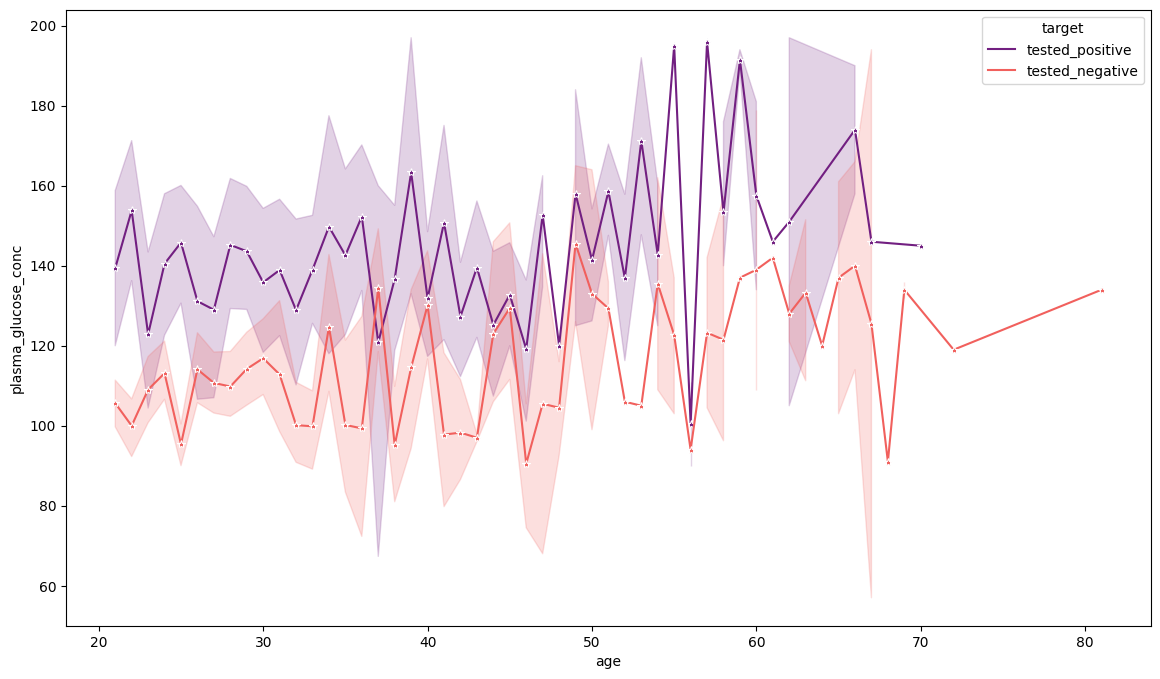

In [16]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, 
             x='age', y='plasma_glucose_conc', 
             hue='target', marker='*', palette='magma')
plt.show()


### Correlation Analysis 🔗


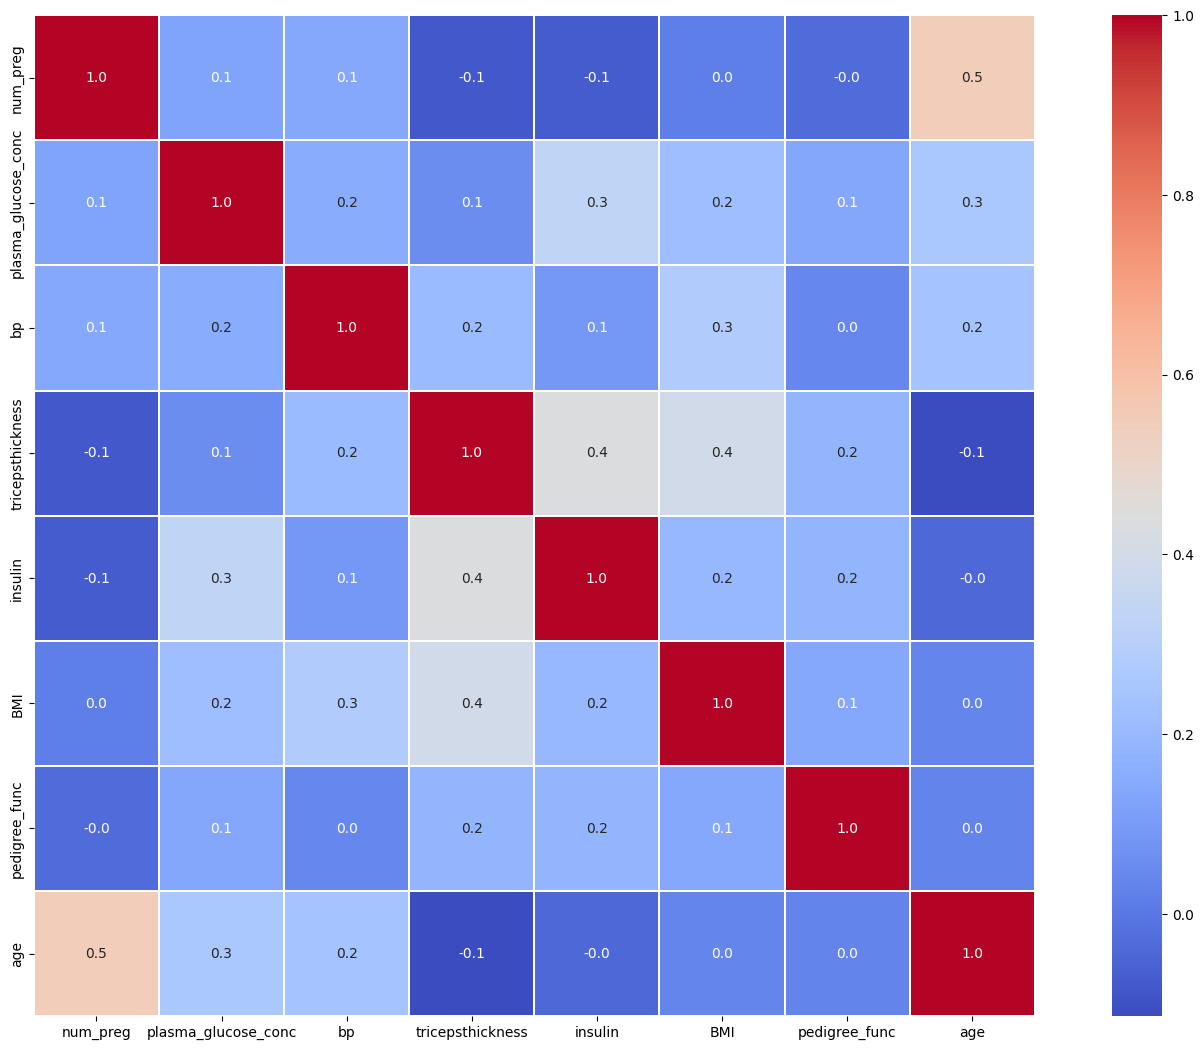

In [17]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 13))
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');


## Data Preprocessing ⚙️


In [18]:
def remove_emissions(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    
    clear_df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    
    return clear_df

for column in list(df.select_dtypes(include=[np.number]).columns):
    df = remove_emissions(df, column)

In [19]:
df['target'] = df['target'].map({'tested_positive': 1, 'tested_negative': 0})
df.head()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


## 🤖 Machine Learning Algorithms

## Overview of Algorithms

---

### 1. Logistic Regression 📉
- **Description:** A simple model for binary classification.
- **Applications:** Medical diagnosis, credit scoring.

---

### 2. Decision Tree Classifier 🌳
- **Description:** A model that makes decisions based on conditions.
- **Applications:** Credit risk assessment, customer segmentation.

---

### 3. Random Forest Classifier 🌲
- **Description:** An ensemble model combining multiple decision trees for improved accuracy.
- **Applications:** Image classification, fraud detection.

---

### 4. Support Vector Machine (SVM) 🛡️
- **Description:** A model that finds the optimal hyperplane to separate classes.
- **Applications:** Pattern recognition, bioinformatics.

---

### 5. Gradient Boosting Classifier 🚀
- **Description:** An ensemble technique that builds models sequentially to minimize errors.
- **Applications:** Ranking problems, customer churn prediction.

---

### 6. XGBoost Classifier 🌟
- **Description:** An efficient and scalable implementation of gradient boosting.
- **Applications:** Kaggle competitions, large-scale data processing.

---

### 7. CatBoost Classifier 🐱
- **Description:** A gradient boosting library that handles categorical features automatically.
- **Applications:** Recommendation systems, time series forecasting.

---

## 📚 Additional Resources
- [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
- [XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/)
- [CatBoost Documentation](https://catboost.ai/docs/)

---



In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [21]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'classifier__C': [0.01, 0.1, 1, 10],
            'classifier__solver': ['liblinear', 'saga']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5]
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__gamma': ['scale', 'auto']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'classifier__iterations': [50, 100],
            'classifier__depth': [3, 5]
        }
    }
}

Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        88
           1       0.56      0.70      0.62        40

    accuracy                           0.73       128
   macro avg       0.70      0.72      0.71       128
weighted avg       0.76      0.73      0.74       128



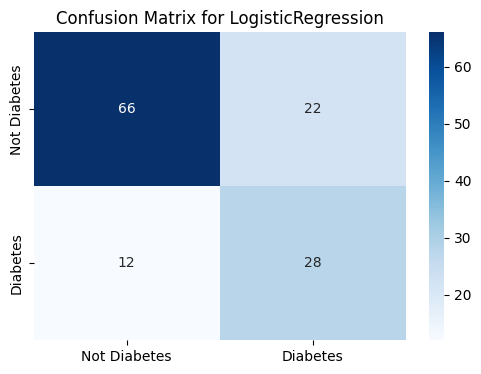

Best parameters for Decision Tree: {'classifier__max_depth': None, 'classifier__min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        88
           1       0.42      0.50      0.45        40

    accuracy                           0.62       128
   macro avg       0.58      0.59      0.58       128
weighted avg       0.65      0.62      0.63       128



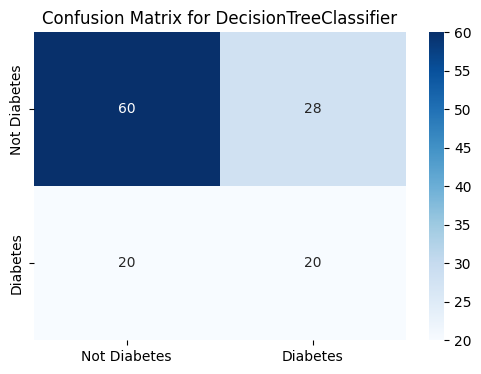

Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        88
           1       0.59      0.60      0.59        40

    accuracy                           0.74       128
   macro avg       0.70      0.70      0.70       128
weighted avg       0.74      0.74      0.74       128



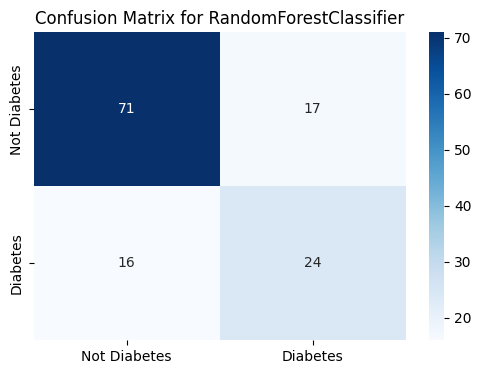

Best parameters for SVM: {'classifier__C': 0.1, 'classifier__gamma': 'auto'}
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        88
           1       0.53      0.75      0.62        40

    accuracy                           0.71       128
   macro avg       0.69      0.72      0.69       128
weighted avg       0.76      0.71      0.72       128



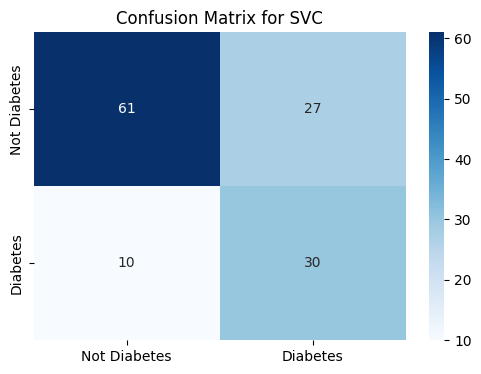

Best parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        88
           1       0.57      0.75      0.65        40

    accuracy                           0.74       128
   macro avg       0.72      0.74      0.72       128
weighted avg       0.77      0.74      0.75       128



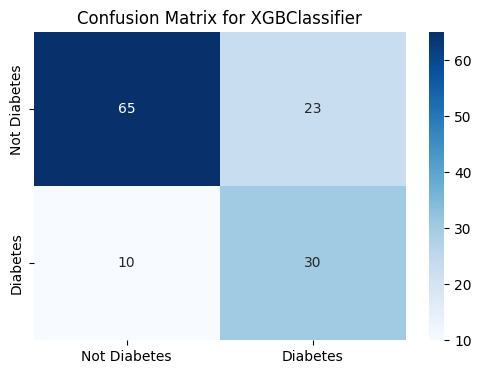

Best parameters for CatBoost: {'classifier__depth': 5, 'classifier__iterations': 50}
              precision    recall  f1-score   support

           0       0.87      0.78      0.83        88
           1       0.61      0.75      0.67        40

    accuracy                           0.77       128
   macro avg       0.74      0.77      0.75       128
weighted avg       0.79      0.77      0.78       128



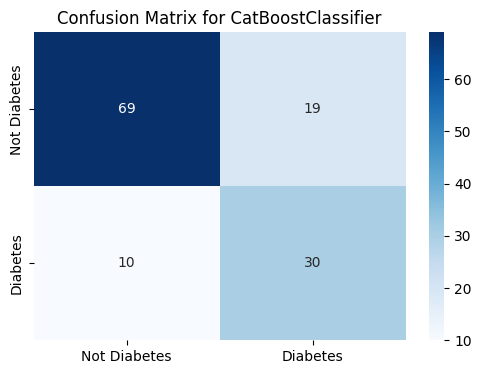

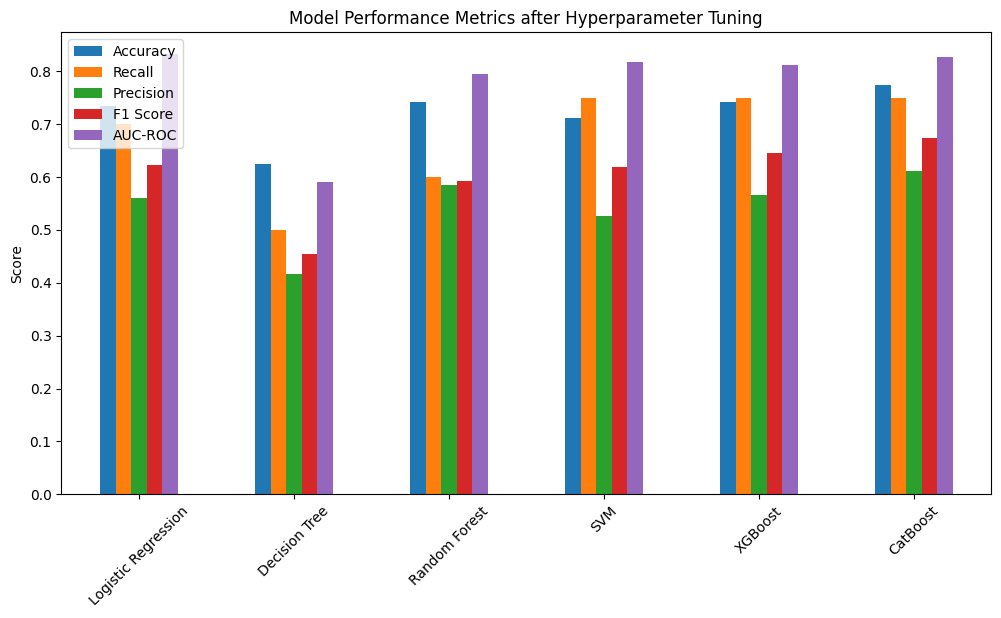

                     Accuracy  Recall  Precision  F1 Score   AUC-ROC
Logistic Regression  0.734375    0.70   0.560000  0.622222  0.832102
Decision Tree        0.625000    0.50   0.416667  0.454545  0.590909
Random Forest        0.742188    0.60   0.585366  0.592593  0.794886
SVM                  0.710938    0.75   0.526316  0.618557  0.816761
XGBoost              0.742188    0.75   0.566038  0.645161  0.812216
CatBoost             0.773438    0.75   0.612245  0.674157  0.826136


In [23]:
def evaluate_model(model_pipeline):
    model_pipeline.fit(X_train, y_train)
    
    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:,1]
    
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Diabetes', 'Diabetes'],
                yticklabels=['Not Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix for {model_pipeline.named_steps["classifier"].__class__.__name__}')
    plt.show()
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }
    
    return metrics

results = {}
for name, model_info in models_params.items():
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model_info['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='f1')
    
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    metrics = evaluate_model(grid_search.best_estimator_)
    results[name] = metrics

results_df = pd.DataFrame(results).T

results_df.plot(kind='bar', figsize=(12,6))
plt.title('Model Performance Metrics after Hyperparameter Tuning')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.show()

print(results_df)

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4169 - loss: 0.8105 - val_accuracy: 0.7647 - val_loss: 0.5961
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7785 - loss: 0.5293 - val_accuracy: 0.7647 - val_loss: 0.4860
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.4669 - val_accuracy: 0.8039 - val_loss: 0.4478
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7348 - loss: 0.4830 - val_accuracy: 0.8137 - val_loss: 0.4332
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.4212 - val_accuracy: 0.8039 - val_loss: 0.4255
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.3900 - val_accuracy: 0.8235 - val_loss: 0.4242
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.3866 - val_accuracy: 0.8137 - val_loss: 0.4233
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7863 - loss: 0.4218 - val_accuracy: 0.8039 - v

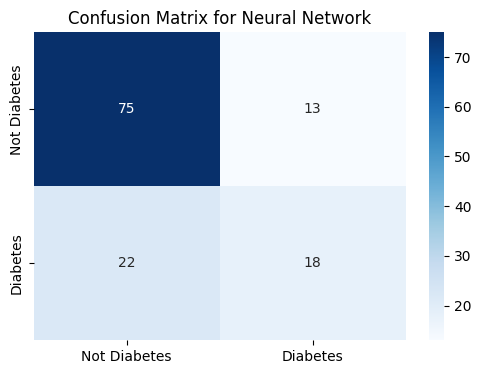

{'Accuracy': 0.7265625, 'Recall': 0.45, 'Precision': 0.5806451612903226, 'F1 Score': 0.5070422535211268, 'AUC-ROC': 0.7241477272727274}


In [25]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=5, validation_split=0.2)

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Diabetes', 'Diabetes'],
            yticklabels=['Not Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Neural Network')
plt.show()

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'AUC-ROC': roc_auc_score(y_test, y_pred_prob)
}

print(metrics)


## Model Evaluation 📊
In this section, we will compare the accuracy of different models and discuss their performance.

## Conclusion ✅
In this notebook, we performed exploratory data analysis on a diabetes dataset and built several machine learning models for classification. The Random Forest Classifier achieved the highest accuracy among the models tested.

## References 📚
- [Diabetes Classification Dataset](https://www.kaggle.com/datasets/bhumikatandon/diabetes-classification-dataset/data) (Kaggle)
- [My github](https://github.com/crissyro)

